In [90]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import typing
from typing import Any, Dict, List, Optional
from typeguard import typechecked
import pickle
import argparse
import scipy
from utils.utils_IO import save_object, load_object

In [4]:
os.getcwd()

'/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/mormyrid-control/mrmrd_ctrl'

In [5]:
data_dict = load_object('/Volumes/sawtell-locker/C1/free/3d_reconstruction/V2/data_dict')

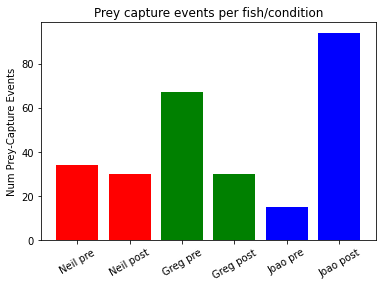

In [12]:
count = 0
color_list = ['r', 'g', 'b']
xlabel_list = []
for i, name in enumerate(data_dict["inds"].keys()):
    for j, cond in enumerate(data_dict["inds"][name].keys()):
        plt.bar(count, len(data_dict["inds"][name][cond]), color = color_list[i])
        count+=1
        xlabel_list.append(name + ' ' + cond)
plt.xticks(ticks=np.arange(count), labels = xlabel_list, rotation=30);
plt.ylabel("Num Prey-Capture Events");
plt.title('Prey capture events per fish/condition');

In [33]:
example_trial = data_dict["trials"]["Joao"]["pre"][0]
example_trial_1 = data_dict["trials"]["Joao"]["post"][0]

In [114]:
t.columns.values

array([('caudal_d', 'x'), ('caudal_d', 'y'), ('caudal_d', 'z'),
       ('caudal_v', 'x'), ('caudal_v', 'y'), ('caudal_v', 'z'),
       ('chin_1_4', 'x'), ('chin_1_4', 'y'), ('chin_1_4', 'z'),
       ('chin_3_4', 'x'), ('chin_3_4', 'y'), ('chin_3_4', 'z'),
       ('chin_base', 'x'), ('chin_base', 'y'), ('chin_base', 'z'),
       ('chin_end', 'x'), ('chin_end', 'y'), ('chin_end', 'z'),
       ('chin_mid', 'x'), ('chin_mid', 'y'), ('chin_mid', 'z'),
       ('head', 'x'), ('head', 'y'), ('head', 'z'), ('mid', 'x'),
       ('mid', 'y'), ('mid', 'z'), ('tail', 'x'), ('tail', 'y'),
       ('tail', 'z')], dtype=object)

                 bodyparts      head                     chin_base            \
                    coords         x         y         z         x         y   
bodyparts coords  1.000000  0.854592 -0.776157  0.562810  0.786441 -0.200268   
head      x       0.854592  1.000000 -0.662524  0.899868  0.991324 -0.286599   
          y      -0.776157 -0.662524  1.000000 -0.410451 -0.597346  0.701104   
          z       0.562810  0.899868 -0.410451  1.000000  0.942174 -0.280671   
chin_base x       0.786441  0.991324 -0.597346  0.942174  1.000000 -0.283034   

                            chin_1_4                      ...    worm_2  \
                         z         x         y         z  ...         z   
bodyparts coords  0.309662  0.781535 -0.160095  0.321268  ...  0.633514   
head      x       0.712437  0.989958 -0.242228  0.730721  ...  0.488472   
          y      -0.103262 -0.588427  0.663316 -0.140213  ... -0.730755   
          z       0.920799  0.945168 -0.248821  0.933618  ...  0

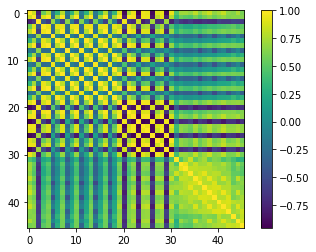

In [104]:
plt.imshow(example_trial.corr())
plt.colorbar()
print(example_trial.corr().head())


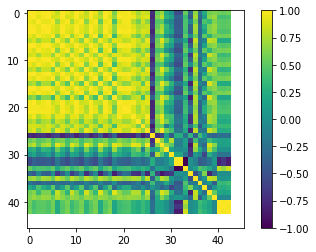

In [50]:
plt.imshow(example_trial_1.corr())
plt.colorbar()

In [77]:
fish_data = example_trial[list(example_trial.columns.levels[0][1:-5])]

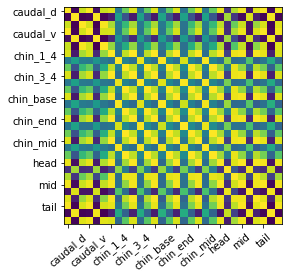

In [78]:
plt.imshow(fish_data.corr())
plt.xticks(ticks = np.arange(0, fish_data.shape[-1], 3), labels =  list(example_trial.columns.levels[0][1:-5]), rotation=40);
plt.yticks(ticks = np.arange(0, fish_data.shape[-1], 3), labels =  list(example_trial.columns.levels[0][1:-5]));

In [80]:
def plot_correlation_heatmap(corr_mat: pd.core.frame.DataFrame, labels: list[str])-> None:
    plt.imshow(corr_mat)
    plt.xticks(ticks = np.arange(0, corr_mat.shape[-1], 3), labels =  labels, rotation=40);
    plt.yticks(ticks = np.arange(0, corr_mat.shape[-1], 3), labels =  labels);

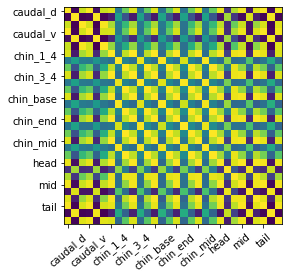

In [81]:
plot_correlation_heatmap(fish_data.corr(), list(example_trial.columns.levels[0][1:-5]))

## store an array of correlation matrices (pages: number of trials)

In [84]:
@typechecked
def make_empty_hierarchical_dict(unique_names: list, unique_conds: list)-> dict:
    trial_dict = {}
    for name in unique_names:
        trial_dict[name] = {}
        for cond in unique_conds:
            trial_dict[name][cond] = []
    return trial_dict

In [88]:
corr_dict = make_empty_hierarchical_dict(list(data_dict["trials"].keys()) ,list(data_dict["trials"]["Joao"].keys()))

In [103]:
@typechecked
def select_columns(dframe: pd.core.frame.DataFrame, names: Optional[list] = None) -> pd.core.frame.DataFrame:
    '''problem here is that is that the column names are unchanged...'''
    if names is None:
        names = list(dframe.columns.levels[0][1:-5])
    return dframe[names]

In [183]:
col_order = ['tail', 'caudal_d', 'caudal_v', 'mid', 'head', 'chin_base', 'chin_1_4', 'chin_mid', 'chin_3_4','chin_end']

In [185]:
for i, fish in enumerate(data_dict["trials"].keys()):
    for j, cond in enumerate(data_dict["trials"][fish].keys()):
        corr_dict[fish][cond] = np.zeros((30, 30, len(data_dict["trials"][fish][cond])))
        for k, trial_dframe in enumerate(data_dict["trials"][fish][cond]):
            curr_dframe = select_columns(trial_dframe)
            curr_dframe = curr_dframe[col_order] # re-order columns to emphasize chin pos
            corr_dict[fish][cond][:,:,k] = curr_dframe.corr()

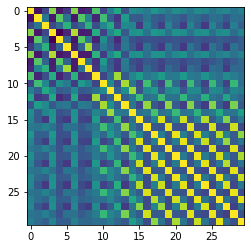

In [186]:
plt.imshow(np.nanmean(corr_dict["Joao"]["post"],-1))

In [154]:
trial_dframe.columns.levels[0][1:-5]

Index(['caudal_d', 'caudal_v', 'chin_1_4', 'chin_3_4', 'chin_base', 'chin_end',
       'chin_mid', 'head', 'mid', 'tail'],
      dtype='object')

## should we or shouldn't we use absolute value for the corrs?

In [222]:
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [241]:
test_corr_mat = np.abs(corr_dict[fish_name]["pre"][:,:, 2])
print(test_corr_mat.shape)
test_corr_mat[0:3, 0:3]

(30, 30)


array([[1.        , 0.06615206, 0.09900456],
       [0.06615206, 1.        , 0.83630413],
       [0.09900456, 0.83630413, 1.        ]])

In [237]:
extract_blocks_from_inds([0, 2], np.tile([1., 2., 3., ], (3, 1)))

[0 2 0 2]
[0 0 2 2]


array([[1., 1.],
       [3., 3.]])

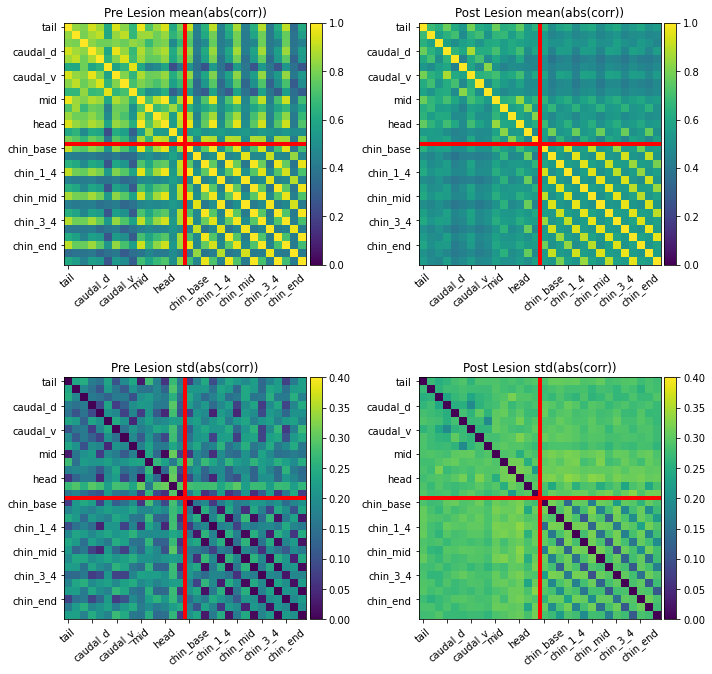

In [242]:
fish_name = "Joao"
fig, ax = plt.subplots(2,2, figsize = (10,10))
im = ax[0,0].imshow(np.nanmean(np.abs(corr_dict[fish_name]["pre"]), -1), vmin=0, vmax=1)
ax[0,0].set_title('Pre Lesion mean(abs(corr))')
im1 = ax[0,1].imshow(np.nanmean(np.abs(corr_dict[fish_name]["post"]), -1), vmin=0, vmax=1)
ax[0,1].set_title('Post Lesion mean(abs(corr))')
im2 = ax[1,0].imshow(np.nanstd(np.abs(corr_dict[fish_name]["pre"]), -1), vmin=0, vmax=.4)
ax[1,0].set_title('Pre Lesion std(abs(corr))')
im3 = ax[1,1].imshow(np.nanstd(np.abs(corr_dict[fish_name]["post"]), -1), vmin=0, vmax=.4)
ax[1,1].set_title('Post Lesion std(abs(corr))')

ax = ax.flatten()
ims = [im, im1, im2, im3]
for i, curr_ax in enumerate(ax):
    divider = make_axes_locatable(curr_ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    curr_ax.set_xticks(ticks = np.arange(0, 30, 3));
    curr_ax.set_xticklabels(labels =  col_order, rotation=40)
    curr_ax.set_yticks(ticks = np.arange(0, 30, 3));
    curr_ax.set_yticklabels(labels =  col_order)
    #rect = patches.Rectangle((15-1.5,15-1.5), 15+1, 15+1, color = 'red', fill=False, linewidth=4)
    #curr_ax.add_patch(rect)
    curr_ax.plot([0-.5, 30-1+.5], [15-.5, 15-.5], linewidth=4, color='red')
    curr_ax.plot([15-.5, 15-.5], [0-.5, 30-1+.5], linewidth=4, color='red')
    fig.colorbar(ims[i], cax=cax, orientation='vertical')
    

fig.tight_layout()
plt.savefig('first_pass_corrs.png')


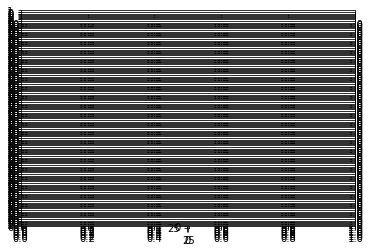

In [130]:
plt.subplots(121)
plt.imshow(np.nanmean(corr_dict["Joao"]["pre"],-1))
#plt.subplots(122)
#plt.imshow(np.nanmean(corr_dict["Joao"]["post"],-1))

In [ ]:
plot_correlation_heatmap(corr_dict["Joao"]["pre"]., labels: list[str])-> None: